In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split



In [91]:
data = pd.read_csv("creditcard_2023.csv")
data.head()
data = data.drop(['id'], axis =1 )

In [92]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.323544e-16,-3.518788e-17,-2.879008e-17,7.197521e-18,-3.838678e-17,-3.198898e-17,2.069287e-17,9.116859e-17,1.991314e-16,...,4.758361e-17,5.398140e-18,5.395017e-18,-1.999311e-18,-3.028957e-17,-7.547400e-18,-3.598760e-17,2.499139e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


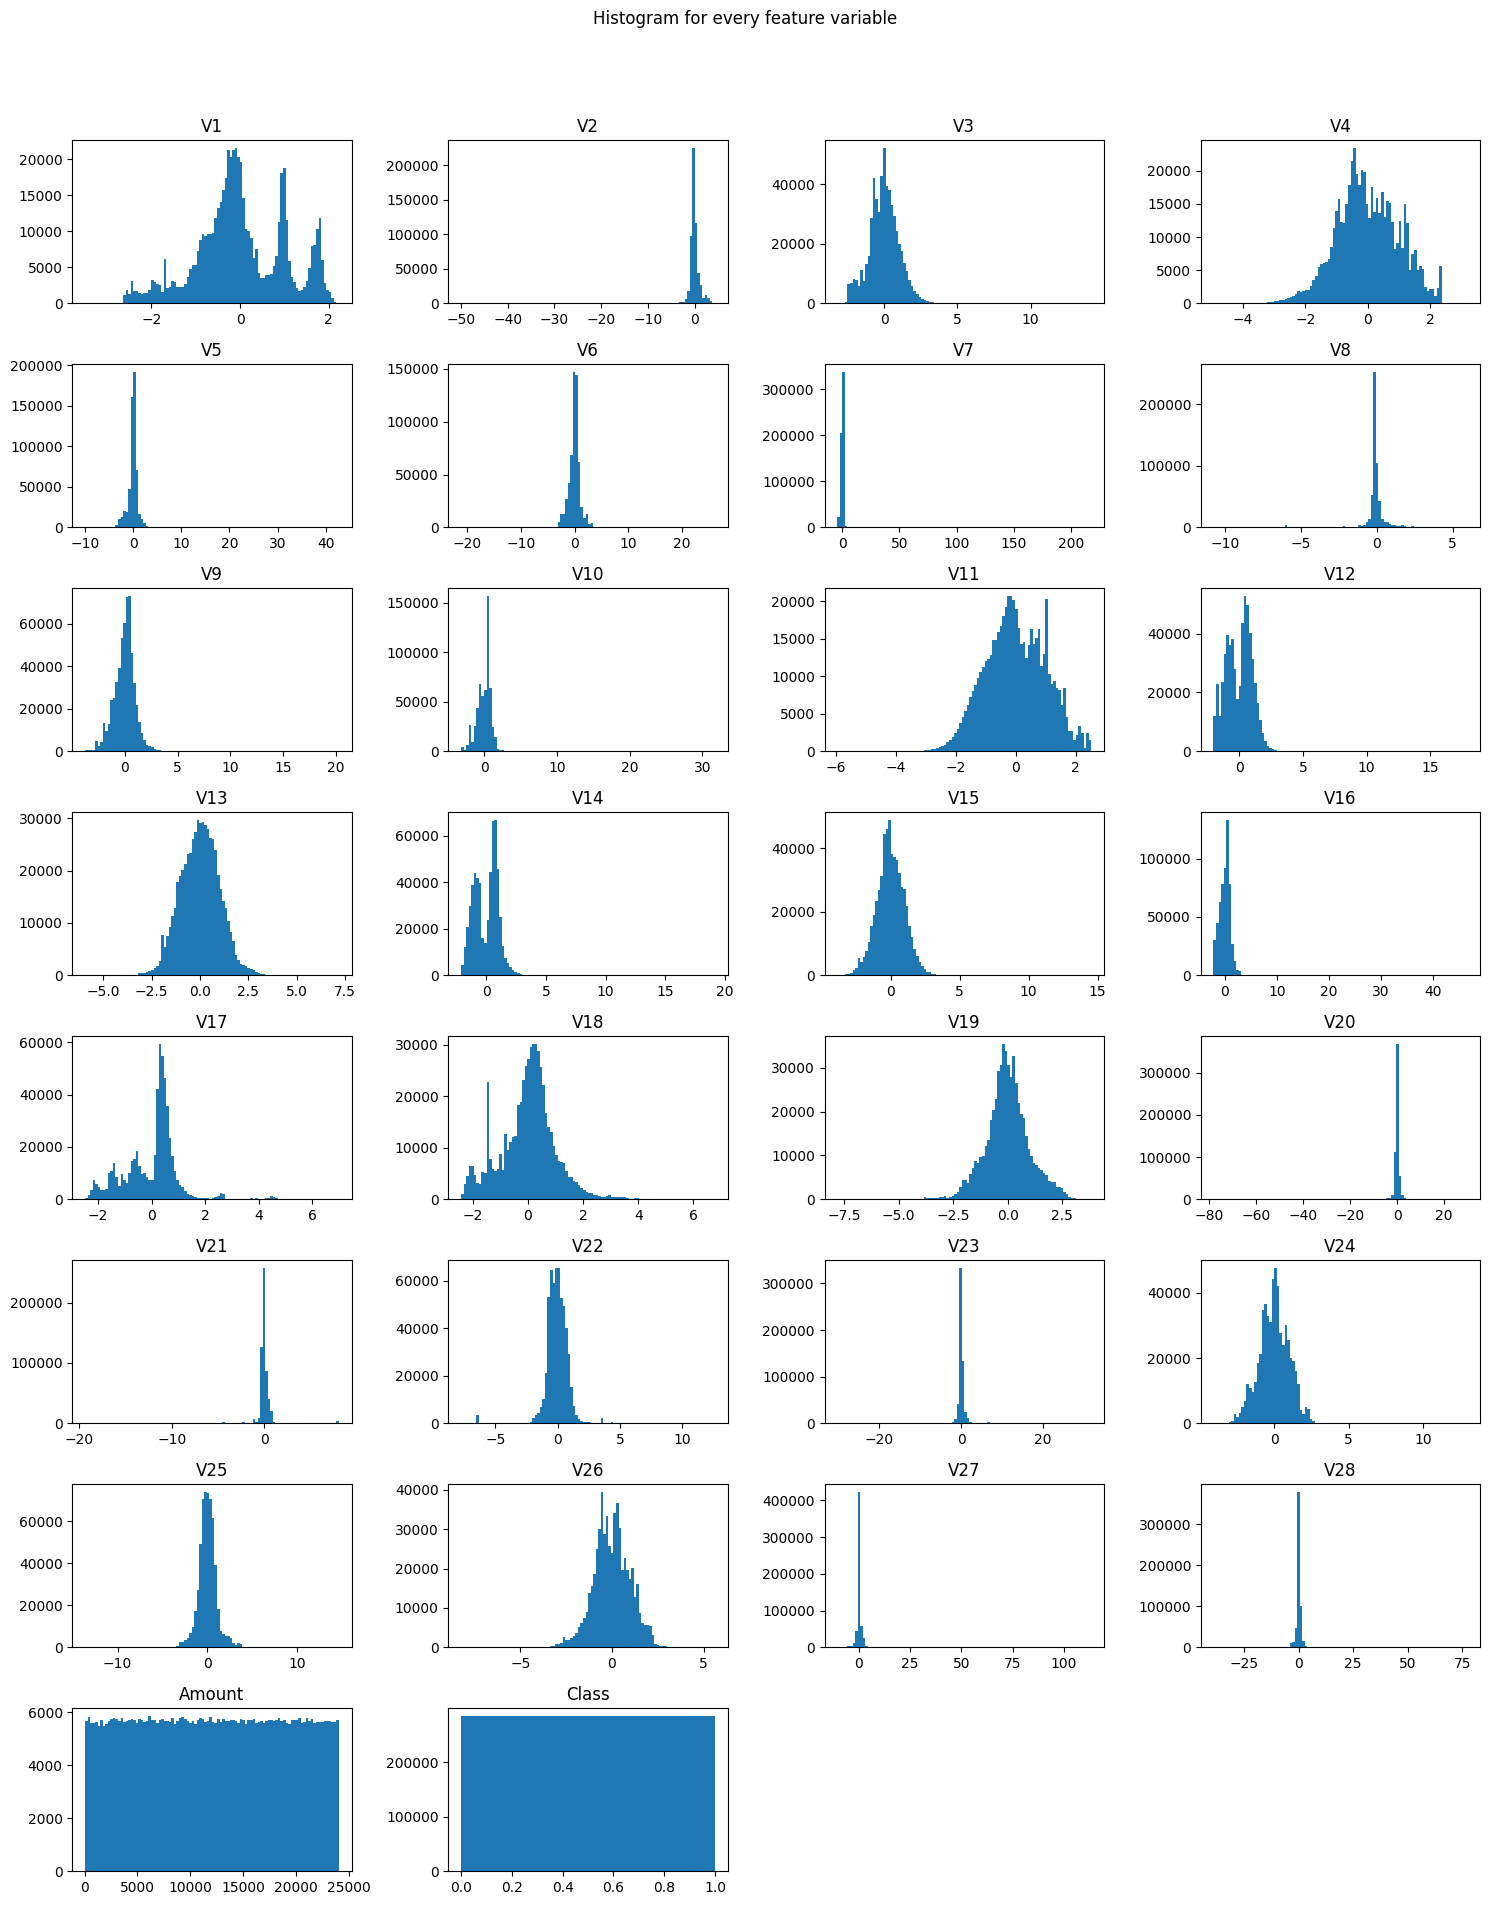

In [93]:
fig = plt.figure(figsize=(15,20))
plt.suptitle("Histogram for every feature variable")
for i in range(data.shape[1]):
    plt.subplot(8,4, i+1)
    f = plt.gca()
    f.set_title(data.columns.values[i])

    values = np.size(data.iloc[:, i].unique())
    if values>100:
        values=100

    plt.hist(data.iloc[:, i], bins=values)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [94]:
#independant variable is all of these features
X = data.iloc[:, data.columns!='Class']

#dependant is the class (whether or not it is a fraudulent charge)
y=data.iloc[:, data.columns=='Class']



In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


In [96]:
y_train.shape

(341178, 1)

In [97]:
X_train.shape

(341178, 29)

Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [99]:
y_pred = forest.predict(X_test)
forest.score(X_test, y_test)


0.9998505179114714

Confusion Matrix

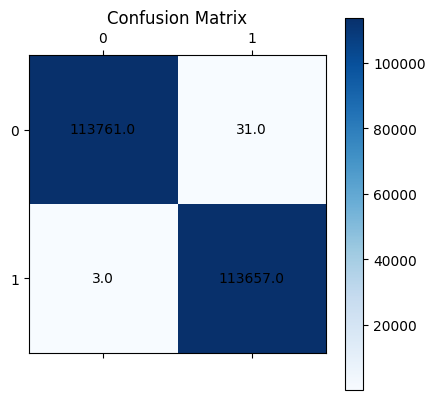

In [100]:
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,y_pred)

#make the confusion matrix plot

plt.matshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
for (i, j), z in np.ndenumerate(cnf_matrix):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()

This model detected 8 non-fraudulent cases as fraud and 35 fraudulent cases as non-fraudulent. Let us see how other models perform compared to this one

In [101]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", acc, "Precision:", prec, "Recall:", rec, "f1:", f1)


Accuracy: 0.9998505179114714 Precision: 0.999727323904018 Recall: 0.9999736054900581 f1: 0.9998504495311153


In [102]:
#store in df to compare with other results
results = pd.DataFrame([['RandomForest',acc, 1-rec, rec, prec, f1]],
                       columns =['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999851,0.000026,0.999974,0.999727,0.99985


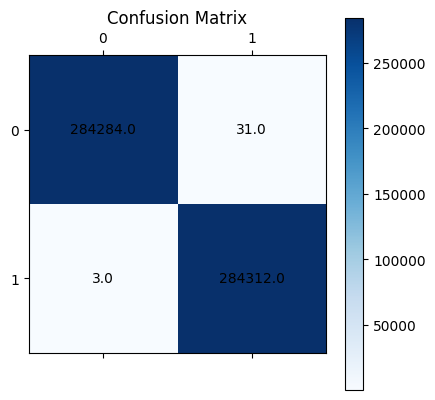

In [103]:
# Confusion matrix on the whole dataset
y_pred = forest.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())

#make the confusion matrix plot

plt.matshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
for (i, j), z in np.ndenumerate(cnf_matrix):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()

Decision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

In [105]:
decision_tree.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

In [106]:
y_pred = decision_tree.predict(X_test)

In [107]:
decision_tree.score(X_test, y_test)

0.9974544079629988

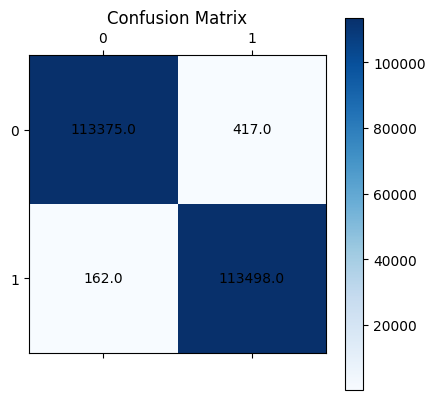

In [108]:
cnf_matrix = confusion_matrix(y_test, y_pred)

#make the confusion matrix plot

plt.matshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
for (i, j), z in np.ndenumerate(cnf_matrix):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()

The performance of the Decision Tree model seems to be worse than the one using the Random Forest model.

In [109]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#adding decision tree to results dataframe in order to compare
results.loc[-1] = ['Decision Tree', acc, 1-rec, rec, prec, f1]
results.index = results.index+1
results = results.sort_index()

results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Decision Tree,0.997454,0.001425,0.998575,0.996339,0.997456
1,RandomForest,0.999851,0.000026,0.999974,0.999727,0.999850


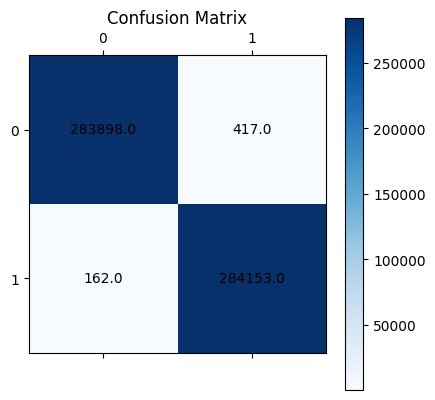

In [110]:
y_pred = decision_tree.predict(X)
cnf_matrix = confusion_matrix(y, y_pred.round())

#make the confusion matrix plot

plt.matshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
for (i, j), z in np.ndenumerate(cnf_matrix):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()

In [111]:
#adding decision tree to results dataframe in order to compare
results.iloc[0] = ['Decision Tree', acc, 1-rec, rec, prec, f1]
results.index = results.index+1
results = results.sort_index()

results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
1,Decision Tree,0.997454,0.001425,0.998575,0.996339,0.997456
2,RandomForest,0.999851,0.000026,0.999974,0.999727,0.999850


Exploring Neural Network Models

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [116]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [117]:
model = Sequential([
    Dense(units=16, input_dim=29, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(24, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid'),
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,113 (8.25 KB)

 Trainable params: 2,113 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

Training

In [119]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
22746/22746 ━━━━━━━━━━━━━━━━━━━━ 11s 432us/step - accuracy: 0.5178 - loss: 6.2641
Epoch 2/5
22746/22746 ━━━━━━━━━━━━━━━━━━━━ 10s 445us/step - accuracy: 0.7617 - loss: 0.4498
Epoch 3/5
22746/22746 ━━━━━━━━━━━━━━━━━━━━ 10s 430us/step - accuracy: 0.9404 - loss: 0.1669
Epoch 4/5
22746/22746 ━━━━━━━━━━━━━━━━━━━━ 10s 427us/step - accuracy: 0.9529 - loss: 0.1329
Epoch 5/5
22746/22746 ━━━━━━━━━━━━━━━━━━━━ 10s 429us/step - accuracy: 0.9549 - loss: 0.1227


In [120]:
score = model.evaluate(X_test, y_test)

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 2s 272us/step - accuracy: 0.9556 - loss: 0.1641


In [121]:
print(score)

[0.16371750831604004, 0.9553400278091431]


This model gives an accuracy of 95.5%

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 2s 247us/step


<Axes: >

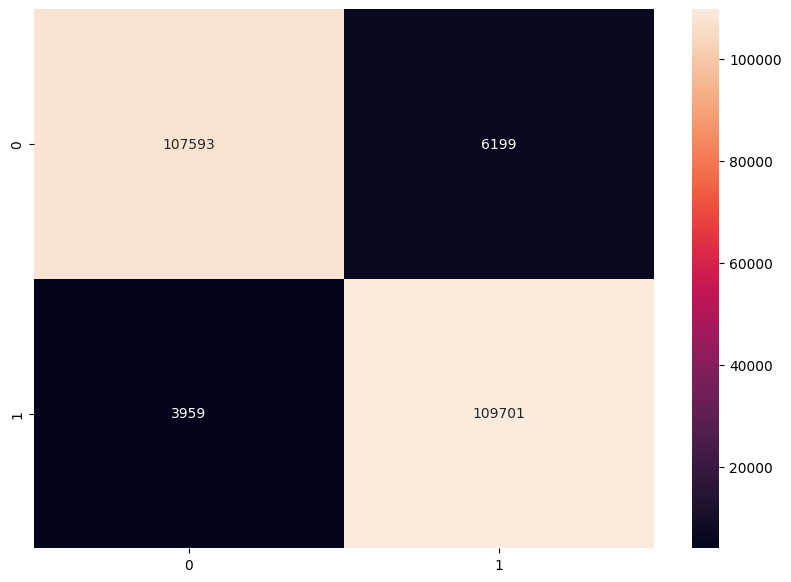

In [122]:
#Confusion matrix
import seaborn as sn
y_pred = model.predict(X_test)

#because sigmoid function gives probability from 0-1, we make the seperation at 0.5
for i in range(len(y_test)):
    if y_pred[i]>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,7))

sn.heatmap(df_cm, annot=True, fmt='g')


Compared to previous models, this NN is performing worse because there is an increase in false positives and false negatives. This model falsely labeled 6199 non-fraudulent cases as fraudulent and falsely labeled 3959 fraudulent cases as non-fraudulent.

In [123]:
#Let us try to reuce the number of false negatives
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

7108/7108 ━━━━━━━━━━━━━━━━━━━━ 2s 249us/step


In [124]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())

In [125]:
print(cnf_matrix)

[[107593   6199]
 [  3959 109701]]


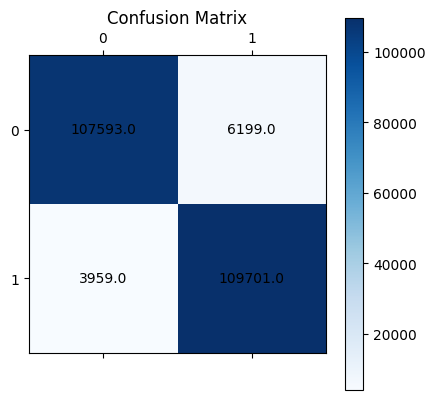

In [126]:
#make the confusion matrix plot

plt.matshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
for (i, j), z in np.ndenumerate(cnf_matrix):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()

In [127]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [128]:
#adding decision tree to results dataframe in order to compare
results.loc[3] = ['NN', acc, 1-rec, rec, prec, f1]

results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
1,Decision Tree,0.997454,0.001425,0.998575,0.996339,0.997456
2,RandomForest,0.999851,0.000026,0.999974,0.999727,0.999850
3,NN,0.955340,0.034832,0.965168,0.946514,0.955750


17770/17770 ━━━━━━━━━━━━━━━━━━━━ 4s 234us/step


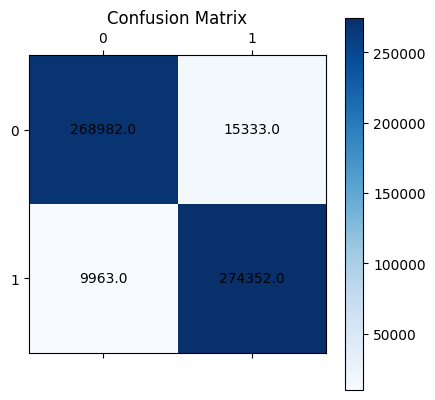

In [129]:
y_pred = model.predict(X)
y_expected=pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())

#make the confusion matrix plot

plt.matshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
for (i, j), z in np.ndenumerate(cnf_matrix):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()

In [130]:
acc= accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())


In [134]:
results.loc[3]=['NN', acc, 1-rec, rec, prec, f1]
results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
1,Decision Tree,0.997454,0.001425,0.998575,0.996339,0.997456
2,RandomForest,0.999851,0.000026,0.999974,0.999727,0.999850
3,NN,0.955514,0.035042,0.964958,0.947070,0.955930


We can see out of all three models the RandomForest seems to have the highesst accuracy rate, lowest false negative rate, highest recall, highest precision, and highest f1-score. The neural network performed the worst with the worst metrics in all categories.